In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

In [16]:
import pandas as pd
import numpy as np

# Create the comprehensive dataset from the LaTeX table
def create_llm_dataframe():
    """
    Convert the LaTeX table to a structured pandas DataFrame
    """
    
    # Define all the data from the table
    data = []
    
    # Models in order
    models = ['GPT-4o-mini', 'GPT-4o', 'o3-mini', 'DeepSeek-R1-Distill-Qwen-32B', 'Llama-3.3-70B', 'Llama-3.1-8B']
    
    # Reasoning approaches
    reasoning_approaches = ['Vanilla', 'CoT', 'ToM Zero', 'ToM First', 'ToM Both']
    
    # All scenario combinations (Proposer-Responder pairs)
    scenarios = [
        'Greedy-Fair', 'Greedy-Greedy', 'Greedy-Selfless', 'Fair-Fair', 
        'Fair-Greedy', 'Fair-Selfless', 'Selfless-Fair', 'Selfless-Greedy', 'Selfless-Selfless'
    ]
    
    # Raw data from the table - organized by scenario, then reasoning, then model
    raw_data = {
        'Greedy-Fair': {
            'Vanilla': [
                (100, 2.9, 52.0, 48.0),  # GPT-4o-mini
                (100, 4.6, 50.0, 50.0),  # GPT-4o
                (50, 4.9, 28.0, 22.0),   # o3-mini
                (90, 3.5, 61.5, 28.5),   # DeepSeek-R1
                (50, 5, 27.5, 22.5),     # Llama-3.3-70B
                (100, 4.7, 52.0, 48.0)   # Llama-3.1-8B
            ],
            'CoT': [
                (100, 2.8, 66.0, 34.0),
                (100, 2.7, 54.5, 45.5),
                (90, 4.7, 53.0, 37.0),
                (90, 3.5, 53.5, 36.5),
                (100, 4.6, 52.0, 48.0),
                (90, 4, 51.17, 38.83)
            ],
            'ToM Zero': [
                (100, 4.2, 58.0, 42.0),
                (100, 3.3, 52.0, 48.0),
                (60, 5, 44.0, 16.0),
                (80, 4.2, 47.0, 33.0),
                (100, 5, 51.5, 48.5),
                (100, 3.6, 55.0, 45.0)
            ],
            'ToM First': [
                (100, 4.4, 56.0, 44.0),
                (100, 2.9, 51.5, 48.5),
                (70, 5, 38.0, 32.0),
                (90, 2.7, 51.5, 38.5),
                (100, 4.2, 51.5, 48.5),
                (100, 3.7, 54.0, 46.0)
            ],
            'ToM Both': [
                (100, 4.4, 52.0, 48.0),
                (100, 3.4, 51.0, 49.0),
                (80, 5, 45.0, 35.0),
                (60, 4, 38.0, 22.0),
                (100, 4.7, 50.5, 49.5),
                (100, 3.2, 55.0, 45.0)
            ]
        },
        'Greedy-Greedy': {
            'Vanilla': [
                (80, 3.4, 40.0, 40.0),
                (90, 4.6, 48.0, 42.0),
                (100, 4.8, 62.0, 38.0),
                (100, 1.2, 88.0, 12.0),
                (100, 1, 90.0, 10.0),
                (80, 4.9, 49.0, 31.0)
            ],
            'CoT': [
                (100, 2.3, 71.0, 29.0),
                (100, 2.8, 54.5, 45.5),
                (100, 4.8, 57.0, 43.0),
                (100, 1, 77.0, 23.0),
                (100, 4.8, 52.6, 47.4),
                (80, 4.5, 41.0, 39.0)
            ],
            'ToM Zero': [
                (100, 4.9, 51.0, 49.0),
                (100, 3.4, 52.0, 48.0),
                (90, 4.8, 53.0, 37.0),
                (100, 1.4, 76.0, 24.0),
                (100, 5, 50.5, 49.5),
                (40, 4.7, 22.0, 18.0)
            ],
            'ToM First': [
                (100, 4.9, 50.0, 50.0),
                (100, 3.9, 47.0, 53.0),
                (80, 4.9, 43.0, 37.0),
                (100, 1.6, 73.0, 27.0),
                (100, 5, 49.0, 51.0),
                (100, 4.4, 50.0, 50.0)
            ],
            'ToM Both': [
                (100, 4.9, 48.0, 52.0),
                (100, 3.3, 51.0, 49.0),
                (100, 5, 58.0, 42.0),
                (100, 2, 71.0, 29.0),
                (80, 5, 40.5, 39.5),
                (100, 4.3, 47.0, 53.0)
            ]
        },
        'Greedy-Selfless': {
            'Vanilla': [
                (100, 3, 50.0, 50.0),
                (90, 4.6, 46.0, 44.0),
                (100, 2.1, 89.0, 11.0),
                (100, 1.1, 89.99, 10.01),
                (40, 5, 24.0, 16.0),
                (90, 4.8, 46.0, 44.0)
            ],
            'CoT': [
                (100, 1.6, 74.0, 26.0),
                (100, 1.4, 66.0, 34.0),
                (90, 4.8, 50.0, 40.0),
                (100, 1, 77.5, 22.5),
                (90, 3.8, 54.5, 35.5),
                (90, 3.2, 52.0, 38.0)
            ],
            'ToM Zero': [
                (100, 3.6, 64.0, 36.0),
                (100, 2.5, 57.0, 43.0),
                (100, 4.1, 66.0, 34.0),
                (100, 1, 69.5, 30.5),
                (100, 2.2, 78.5, 21.5),
                (100, 4.2, 54.0, 46.0)
            ],
            'ToM First': [
                (100, 4.8, 51.0, 49.0),
                (100, 3.3, 51.0, 49.0),
                (90, 5, 50.0, 40.0),
                (100, 1, 73.0, 27.0),
                (100, 4.7, 51.5, 48.5),
                (90, 4, 46.0, 44.0)
            ],
            'ToM Both': [
                (100, 3.7, 61.0, 39.0),
                (100, 2.7, 55.0, 45.0),
                (100, 4.7, 59.0, 41.0),
                (100, 1, 73.0, 27.0),
                (100, 4.4, 54.0, 46.0),
                (100, 3.7, 56.0, 44.0)
            ]
        },
        'Fair-Fair': {
            'Vanilla': [
                (100, 2.2, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0)
            ],
            'CoT': [
                (100, 1.1, 54.5, 45.5),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 52.0, 48.0),
                (100, 1.1, 50.0, 50.0),
                (100, 1.1, 50.0, 50.0)
            ],
            'ToM Zero': [
                (100, 1.1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 51.0, 49.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0)
            ],
            'ToM First': [
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1.4, 50.0, 50.0)
            ],
            'ToM Both': [
                (100, 1.2, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1.4, 50.25, 49.75),
                (100, 1, 50.0, 50.0),
                (100, 1.2, 50.0, 50.0)
            ]
        },
        'Fair-Greedy': {
            'Vanilla': [
                (100, 3.6, 43.0, 57.0),
                (30, 4.7, 12.0, 18.0),
                (100, 3.2, 49.0, 51.0),
                (100, 1.8, 51.0, 49.0),
                (20, 5, 10.0, 10.0),
                (10, 4.7, 6.0, 4.0)
            ],
            'CoT': [
                (100, 1.2, 49.0, 51.0),
                (100, 2.1, 43.0, 57.0),
                (100, 1.1, 49.0, 51.0),
                (100, 1.3, 47.0, 53.0),
                (100, 3.4, 43.0, 57.0),
                (90, 3.5, 49.99, 40.01)
            ],
            'ToM Zero': [
                (40, 3.9, 19.0, 21.0),
                (100, 2.1, 40.0, 60.0),
                (100, 3.6, 50.0, 50.0),
                (100, 1.2, 48.5, 51.5),
                (100, 3.7, 41.0, 59.0),
                (50, 4.5, 28.0, 22.0)
            ],
            'ToM First': [
                (90, 1.5, 44.0, 46.0),
                (100, 2.9, 40.0, 60.0),
                (100, 3, 48.0, 52.0),
                (100, 1.3, 49.25, 50.75),
                (70, 3.8, 25.0, 45.0),
                (30, 5, 11.0, 19.0)
            ],
            'ToM Both': [
                (60, 3.5, 22.0, 38.0),
                (100, 2.7, 41.5, 58.5),
                (100, 3.3, 49.0, 51.0),
                (100, 1.9, 51.75, 48.25),
                (100, 3.5, 33.0, 67.0),
                (40, 4.4, 17.0, 23.0)
            ]
        },
        'Fair-Selfless': {
            'Vanilla': [
                (100, 2.3, 49.05, 50.95),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (0, 5, 0, 0),
                (100, 1, 50.0, 50.0)
            ],
            'CoT': [
                (100, 1, 54.0, 46.0),
                (100, 1, 53.0, 47.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (80, 3, 40.0, 40.0),
                (100, 1.3, 47.0, 53.0)
            ],
            'ToM Zero': [
                (100, 1, 53.0, 47.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 51.0, 49.0),
                (20, 4.6, 6.0, 14.0),
                (100, 1.7, 53.0, 47.0)
            ],
            'ToM First': [
                (100, 1.2, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 51.0, 49.0),
                (70, 3.8, 24.0, 46.0),
                (50, 4, 27.0, 23.0)
            ],
            'ToM Both': [
                (100, 1, 52.0, 48.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 50.0, 50.0),
                (100, 1, 52.0, 48.0),
                (70, 3, 27.0, 43.0),
                (80, 3.6, 41.0, 39.0)
            ]
        },
        'Selfless-Fair': {
            'Vanilla': [
                (100, 2, 20.0, 80.0),
                (10, 5, 5.0, 5.0),
                (80, 2.3, 10.0, 70.0),
                (100, 1.5, 37.0, 63.0),
                (0, 5, 0, 0),
                (100, 2.3, 50.0, 50.0)
            ],
            'CoT': [
                (100, 1.1, 19.0, 81.0),
                (100, 1, 34.0, 66.0),
                (100, 1, 5.0, 95.0),
                (100, 1.3, 35.0, 65.0),
                (50, 5, 17.0, 33.0),
                (100, 2.8, 47.0, 53.0)
            ],
            'ToM Zero': [
                (100, 2.1, 17.0, 83.0),
                (100, 2, 32.0, 68.0),
                (100, 1, 15.0, 85.0),
                (100, 1.7, 41.0, 59.0),
                (60, 4.9, 20.0, 40.0),
                (90, 2.4, 42.0, 48.0)
            ],
            'ToM First': [
                (100, 2.3, 13.0, 87.0),
                (100, 1.8, 6.0, 94.0),
                (100, 1.3, 10.0, 90.0),
                (90, 1.8, 41.0, 49.0),
                (0, 5, 0, 0),
                (100, 2.1, 50.0, 50.0)
            ],
            'ToM Both': [
                (100, 3.2, 30.0, 70.0),
                (100, 3.1, 35.0, 65.0),
                (100, 1.4, 25.0, 75.0),
                (100, 1.4, 41.0, 59.0),
                (20, 4.9, 5.0, 15.0),
                (100, 1.9, 50.0, 50.0)
            ]
        },
        'Selfless-Greedy': {
            'Vanilla': [
                (90, 2.4, 18.0, 72.0),
                (0, 5, 0, 0),
                (100, 1, 5.0, 95.0),
                (100, 1.2, 32.0, 68.0),
                (0, 5, 0, 0),
                (70, 4.8, 33.0, 37.0)
            ],
            'CoT': [
                (100, 1, 16.0, 84.0),
                (100, 1, 26.0, 74.0),
                (100, 1, 1.0, 99.0),
                (100, 1.1, 36.0, 64.0),
                (100, 1, 0.0, 100.0),
                (80, 3.5, 33.0, 47.0)
            ],
            'ToM Zero': [
                (80, 2.9, 13.0, 67.0),
                (100, 1, 22.0, 78.0),
                (100, 1, 15.0, 85.0),
                (100, 1.1, 32.0, 68.0),
                (100, 1, 0.0, 100.0),
                (100, 3.9, 41.0, 59.0)
            ],
            'ToM First': [
                (100, 2, 11.0, 89.0),
                (100, 1, 0.0, 100.0),
                (100, 1.2, 5.0, 95.0),
                (100, 1, 28.0, 72.0),
                (100, 1.2, 0.0, 100.0),
                (40, 4.4, 14.0, 26.0)
            ],
            'ToM Both': [
                (90, 2.5, 17.0, 73.0),
                (100, 1.1, 7.0, 93.0),
                (100, 1.4, 4.0, 96.0),
                (100, 1.2, 35.0, 65.0),
                (100, 1.5, 1.0, 99.0),
                (70, 4.5, 28.0, 44.5)
            ]
        },
        'Selfless-Selfless': {
            'Vanilla': [
                (100, 1, 0.0, 100.0),
                (80, 1.9, 1.0, 79.0),
                (100, 1.2, 6.0, 94.0),
                (100, 2, 39.0, 61.0),
                (100, 1, 0.0, 100.0),
                (90, 2.5, 45.0, 45.0)
            ],
            'CoT': [
                (100, 1.1, 14.0, 86.0),
                (100, 1, 37.0, 63.0),
                (100, 1, 5.0, 95.0),
                (100, 1.2, 31.0, 69.0),
                (40, 4.8, 17.0, 23.0),
                (100, 2.5, 53.0, 47.0)
            ],
            'ToM Zero': [
                (100, 2.5, 17.0, 83.0),
                (90, 2.9, 35.0, 55.0),
                (100, 1, 11.0, 89.0),
                (100, 1, 49.0, 51.0),
                (10, 5, 5.0, 5.0),
                (60, 3.4, 21.0, 34.0)
            ],
            'ToM First': [
                (100, 2.3, 13.0, 87.0),
                (100, 2.1, 8.25, 91.75),
                (100, 1.1, 14.0, 86.0),
                (100, 1.3, 50.0, 50.0),
                (80, 3, 0.0, 80.0),
                (90, 4.2, 45.0, 45.0)
            ],
            'ToM Both': [
                (90, 2.4, 16.0, 74.0),
                (100, 1.8, 25.0, 75.0),
                (100, 1, 3.0, 97.0),
                (100, 1.1, 35.0, 65.0),
                (10, 5, 5.0, 5.0),
                (90, 2.2, 45.0, 45.0)
            ]
        }
    }
    
    # Build the DataFrame
    for scenario in scenarios:
        for reasoning in reasoning_approaches:
            for i, model in enumerate(models):
                ac, avg_turns, proposer_payout, responder_payout = raw_data[scenario][reasoning][i]
                
                # Split scenario into proposer and responder strategies
                proposer_strategy, responder_strategy = scenario.split('-')
                
                data.append({
                    'Scenario': scenario,
                    'Proposer_Strategy': proposer_strategy,
                    'Responder_Strategy': responder_strategy,
                    'Reasoning': reasoning,
                    'Model': model,
                    'Acceptance_Rate': ac,
                    'Avg_Turns': avg_turns,
                    'Proposer_Payout': proposer_payout,
                    'Responder_Payout': responder_payout,
                    'Total_Payout': proposer_payout + responder_payout,
                    'Payout_Difference': abs(proposer_payout - responder_payout),
                    'Fairness_Score': 100 - abs(proposer_payout - responder_payout)
                })
    
    return pd.DataFrame(data)

# Create the DataFrame
df = create_llm_dataframe()

In [17]:
df

,Scenario,Proposer_Strategy,Responder_Strategy,Reasoning,Model,Acceptance_Rate,Avg_Turns,Proposer_Payout,Responder_Payout,Total_Payout,Payout_Difference,Fairness_Score
0,Greedy-Fair,Greedy,Fair,Vanilla,GPT-4o-mini,100,2.9,52.0,48.0,100.0,4.0,96.0
1,Greedy-Fair,Greedy,Fair,Vanilla,GPT-4o,100,4.6,50.0,50.0,100.0,0.0,100.0
2,Greedy-Fair,Greedy,Fair,Vanilla,o3-mini,50,4.9,28.0,22.0,50.0,6.0,94.0
3,Greedy-Fair,Greedy,Fair,Vanilla,DeepSeek-R1-Distill-Qwen-32B,90,3.5,61.5,28.5,90.0,33.0,67.0
4,Greedy-Fair,Greedy,Fair,Vanilla,Llama-3.3-70B,50,5.0,27.5,22.5,50.0,5.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,Selfless-Selfless,Selfless,Selfless,ToM Both,GPT-4o,100,1.8,25.0,75.0,100.0,50.0,50.0
266,Selfless-Selfless,Selfless,Selfless,ToM Both,o3-mini,100,1.0,3.0,97.0,100.0,94.0,6.0
267,Selfless-Selfless,Selfless,Selfless,ToM Both,DeepSeek-R1-Distill-Qwen-32B,100,1.1,35.0,65.0,100.0,30.0,70.0
268,Selfless-Selfless,Selfless,Selfless,ToM Both,Llama-3.3-70B,10,5.0,5.0,5.0,10.0,0.0,100.0


In [18]:
df['Model'] = df.apply(lambda x: x['Model'].replace('DeepSeek-R1-Distill-Qwen-32B', 'DeepSeek R1'), axis=1)

In [19]:
# Calculate average metrics for each model across all scenarios
model_stats = df.groupby('Model').agg({
    'Acceptance_Rate': 'mean',
    'Avg_Turns': 'mean',
    'Proposer_Payout': 'mean',
    'Responder_Payout': 'mean'
}).reset_index()

# Add derived metrics
model_stats['Total_Payout'] = model_stats['Proposer_Payout'] + model_stats['Responder_Payout']
model_stats['Efficiency'] = (1 - (model_stats['Avg_Turns'])/5) * 100  # Convert turns to efficiency score
model_stats['Fairness'] = 100 - abs(model_stats['Proposer_Payout'] - model_stats['Responder_Payout'])  # Fairness based 

In [20]:
model_stats

,Model,Acceptance_Rate,Avg_Turns,Proposer_Payout,Responder_Payout,Total_Payout,Efficiency,Fairness
0,DeepSeek R1,97.777778,1.511111,51.916444,45.861333,97.777778,69.777778,93.944889
1,GPT-4o,93.111111,2.346667,38.650000,54.461111,93.111111,53.066667,84.188889
2,GPT-4o-mini,96.000000,2.520000,39.278889,56.721111,96.000000,49.600000,82.557778
3,Llama-3.1-8B,84.222222,3.304444,42.381333,41.785333,84.166667,33.911111,99.404000
4,Llama-3.3-70B,72.444444,3.591111,29.935556,42.508889,72.444444,28.177778,87.426667
5,o3-mini,95.111111,2.482222,37.200000,57.911111,95.111111,50.355556,79.288889


In [21]:
# Calculate average metrics for each model across all scenarios
reasoning_stats = df.groupby('Scenario').agg({
    'Acceptance_Rate': 'mean',
    'Avg_Turns': 'mean',
    'Proposer_Payout': 'mean',
    'Responder_Payout': 'mean'
}).reset_index()

reasoning_stats['Acceptance_Rate'] = round(reasoning_stats['Acceptance_Rate'], 2)
reasoning_stats['Avg_Turns'] = round(reasoning_stats['Avg_Turns'], 2)
reasoning_stats['Proposer_Payout'] = round(reasoning_stats['Proposer_Payout'], 2)
reasoning_stats['Responder_Payout'] = round(reasoning_stats['Responder_Payout'], 2)

# Add derived metrics
reasoning_stats['Total_Payout'] = reasoning_stats['Proposer_Payout'] + reasoning_stats['Responder_Payout']
reasoning_stats['Efficiency'] = (1 - (reasoning_stats['Avg_Turns'])/5) * 100  # Convert turns to efficiency score
reasoning_stats['Fairness'] = 100 - abs(reasoning_stats['Proposer_Payout'] - reasoning_stats['Responder_Payout'])  # Fairness based 

In [22]:
reasoning_stats

,Scenario,Acceptance_Rate,Avg_Turns,Proposer_Payout,Responder_Payout,Total_Payout,Efficiency,Fairness
0,Fair-Fair,100.00,1.09,50.26,49.74,100.00,78.2,99.48
1,Fair-Greedy,81.00,3.05,37.00,44.00,81.00,39.0,93.00
2,Fair-Selfless,89.00,1.75,44.34,44.66,89.00,65.0,99.68
3,Greedy-Fair,90.00,4.03,50.09,39.91,90.00,19.4,89.82
4,Greedy-Greedy,94.00,3.78,55.40,38.60,94.00,24.4,83.20
5,Greedy-Selfless,95.67,3.23,59.62,36.05,95.67,35.4,76.43
6,Selfless-Fair,83.33,2.49,25.07,58.27,83.34,50.2,66.80
7,Selfless-Greedy,87.33,2.06,15.77,71.65,87.42,58.8,44.12
8,Selfless-Selfless,87.67,2.15,21.51,65.99,87.50,57.0,55.52


In [23]:
scenario_colors = {
    # Greedy scenarios (warmer colors - reds/oranges)
    'Greedy-Fair': '#E74C3C',      # Bold Red - aggressive but fair
    'Greedy-Greedy': '#C0392B',    # Dark Red - most competitive
    'Greedy-Selfless': '#FF6B35',  # Orange-Red - greedy meets giving
    
    # Fair scenarios (neutral/balanced colors - blues/teals)
    'Fair-Fair': '#3498DB',        # Bright Blue - balanced and cooperative  
    'Fair-Greedy': '#2980B9',      # Darker Blue - fair meets competitive
    'Fair-Selfless': '#1ABC9C',    # Teal - fair meets generous
    
    # Selfless scenarios (cooler colors - greens/purples)
    'Selfless-Fair': '#27AE60',    # Green - generous but balanced
    'Selfless-Greedy': '#8E44AD',  # Purple - generous meets competitive
    'Selfless-Selfless': '#2ECC71' # Light Green - most cooperative
}

In [24]:
scenario_cols = [scenario_colors[scen] for scen in reasoning_stats['Scenario']]
scenario_lines = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']

In [27]:
model_stats

,Model,Acceptance_Rate,Avg_Turns,Proposer_Payout,Responder_Payout,Total_Payout,Efficiency,Fairness,Acceptance,Proposer_Payout_Norm,Responder_Payout_Norm
0,DeepSeek R1,97.777778,1.511111,51.916444,45.861333,97.777778,69.777778,93.944889,97.777778,100.000000,79.192632
1,GPT-4o,93.111111,2.346667,38.650000,54.461111,93.111111,53.066667,84.188889,93.111111,74.446547,94.042594
2,GPT-4o-mini,96.000000,2.520000,39.278889,56.721111,96.000000,49.600000,82.557778,96.000000,75.657895,97.945127
3,Llama-3.1-8B,84.222222,3.304444,42.381333,41.785333,84.166667,33.911111,99.404000,84.222222,81.633736,72.154259
4,Llama-3.3-70B,72.444444,3.591111,29.935556,42.508889,72.444444,28.177778,87.426667,72.444444,57.661028,73.403684
5,o3-mini,95.111111,2.482222,37.200000,57.911111,95.111111,50.355556,79.288889,95.111111,71.653597,100.000000


In [28]:
model_mark = {model_name: marker for model_name, marker in zip(
    model_stats['Model'].unique(), ['o', 's', '^', 'D', 'P', 'X']
)}

In [86]:
def create_multi_model_radar(normalized_stats):
    """Create radar charts comparing all models"""
    
    # Define categories for the radar chart
    categories = ['AC', 'Efficiency', 'Prop.\nPayout', 'Resp.\nPayout']
    
    # Normalize metrics to 0-100 scale for better visualization
    normalized_stats['Acceptance'] = normalized_stats['Acceptance_Rate']  # Already 0-100
    normalized_stats['Efficiency'] = normalized_stats['Efficiency']
    # normalized_stats['Total_Payout_Norm'] = (normalized_stats['Total_Payout'] / normalized_stats['Total_Payout'].max()) * 100
    # normalized_stats['Fairness'] = normalized_stats['Fairness']
    normalized_stats['Proposer_Payout_Norm'] = (normalized_stats['Proposer_Payout'] / normalized_stats['Proposer_Payout'].max()) * 100
    normalized_stats['Responder_Payout_Norm'] = (normalized_stats['Responder_Payout'] / normalized_stats['Responder_Payout'].max()) * 100
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(10, 5), subplot_kw=dict(projection='polar'))
    fig.suptitle('LLM Performance Radar Charts - Multi-Metric Comparison', size=16, weight='bold')
    
    axes = axes.flatten()
    
    for i, (idx, row) in enumerate(normalized_stats.iterrows()):
        model_name = row['Model']
        values = [
            row['Acceptance'],
            row['Efficiency'],
            # row['Total_Payout_Norm'],
            row['Proposer_Payout_Norm'],
            row['Responder_Payout_Norm']
        ]
        
        # Number of categories
        N = len(categories)
        
        # Calculate angles
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        # Close the polygon
        values += values[:1]
        
        ax = axes[i]
        
        # Plot
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], markersize=6)
        ax.fill(angles, values, alpha=0.25, color=colors[i])
        
        # Customize
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, size=9)
        ax.set_ylim(0, 100)
        ax.set_title(model_name, size=12, weight='bold', pad=20)
        ax.grid(True, alpha=0.3)
        
        # Add value labels
        for angle, value, category in zip(angles[:-1], values[:-1], categories):
            ax.text(angle, value + 5, f'{value:.1f}', ha='center', va='center', size=8, weight='bold')
    
    plt.tight_layout()
    return fig

def create_overlay_radar(normalized_stats, col='Model', title='LLM Performance Comparison - All Models Overlay'):
    """Create radar charts comparing all models"""
    
    # Define categories for the radar chart
    categories = ['AC', 'Efficiency', 'Prop.\nPay', 'Resp. Payout']
    
    normalized_stats['Acceptance'] = normalized_stats['Acceptance_Rate']  # Already 0-100
    normalized_stats['Efficiency'] = normalized_stats['Efficiency']
    # normalized_stats['Total_Payout_Norm'] = (normalized_stats['Total_Payout'] / normalized_stats['Total_Payout'].max()) * 100
    # normalized_stats['Fairness'] = normalized_stats['Fairness']
    normalized_stats['Proposer_Payout_Norm'] = (normalized_stats['Proposer_Payout'] / normalized_stats['Proposer_Payout'].max()) * 100
    normalized_stats['Responder_Payout_Norm'] = (normalized_stats['Responder_Payout'] / normalized_stats['Responder_Payout'].max()) * 100

    # Number of categories
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    if col == 'Scenario':
        colors = scenario_cols
        line_styles = scenario_lines
    else:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        line_styles = ['-', 'dotted', '-', 'dotted', '-', 'dotted']
    
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='polar'))
    
    for i, (idx, row) in enumerate(normalized_stats.iterrows()):
        model_name = row[col]
        values = [
            row['Acceptance'],
            row['Efficiency'],
            row['Proposer_Payout_Norm'],
            row['Responder_Payout_Norm']
        ]
        values += values[:1]  # Close the polygon
        
        ax.plot(angles, values, 'o-', linewidth=2, label=model_name, 
                color=colors[i], linestyle=line_styles[i], markersize=6, marker=model_mark[model_name])
        ax.fill(angles, values, alpha=0.05, color=colors[i])
    
    # Customize
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=15)
    ax.set_ylim(0, 100)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)
    # ax.set_title(title, size=17, weight='bold', pad=30)
    ax.grid(True, alpha=0.4)
    ax.legend(ncol=3, fontsize=12, bbox_to_anchor = (1.1, -0.07))
    
    return fig

/var/folders/64/qfbnk9gx6bqb3fbw3zmjw29c0000gp/T/ipykernel_18272/3107530864.py:100: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=model_name,
/var/folders/64/qfbnk9gx6bqb3fbw3zmjw29c0000gp/T/ipykernel_18272/3107530864.py:100: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=model_name,


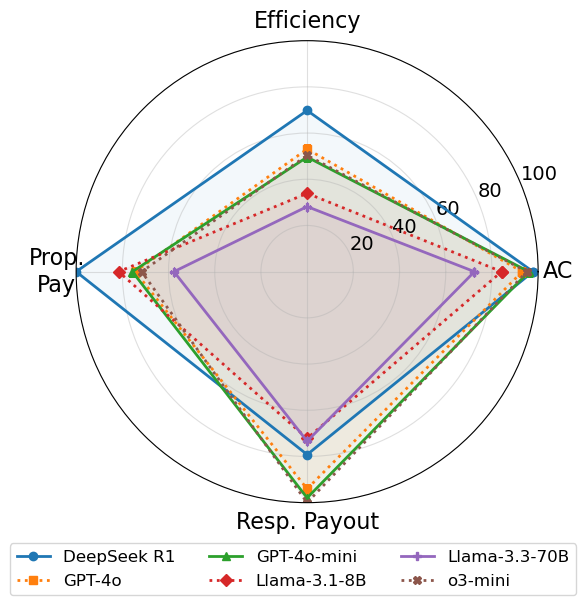

In [87]:
fig = create_overlay_radar(model_stats, col='Model', title='LLM Performance Comparison')

fig.savefig('../plots/llm_perf_radar.pdf', dpi=600, bbox_inches='tight')

In [92]:
reasoning_stats.to_json()

'{"Scenario":{"0":"Fair-Fair","1":"Fair-Greedy","2":"Fair-Selfless","3":"Greedy-Fair","4":"Greedy-Greedy","5":"Greedy-Selfless","6":"Selfless-Fair","7":"Selfless-Greedy","8":"Selfless-Selfless"},"Acceptance_Rate":{"0":100.0,"1":81.0,"2":89.0,"3":90.0,"4":94.0,"5":95.67,"6":83.33,"7":87.33,"8":87.67},"Avg_Turns":{"0":1.09,"1":3.05,"2":1.75,"3":4.03,"4":3.78,"5":3.23,"6":2.49,"7":2.06,"8":2.15},"Proposer_Payout":{"0":50.26,"1":37.0,"2":44.34,"3":50.09,"4":55.4,"5":59.62,"6":25.07,"7":15.77,"8":21.51},"Responder_Payout":{"0":49.74,"1":44.0,"2":44.66,"3":39.91,"4":38.6,"5":36.05,"6":58.27,"7":71.65,"8":65.99},"Total_Payout":{"0":100.0,"1":81.0,"2":89.0,"3":90.0,"4":94.0,"5":95.67,"6":83.34,"7":87.42,"8":87.5},"Efficiency":{"0":78.2,"1":39.0,"2":65.0,"3":19.4,"4":24.4,"5":35.4,"6":50.2,"7":58.8,"8":57.0},"Fairness":{"0":99.48,"1":93.0,"2":99.68,"3":89.82,"4":83.2,"5":76.43,"6":66.8,"7":44.12,"8":55.52}}'

In [92]:
df

,Scenario,Acceptance_Rate,Avg_Turns,Proposer_Payout,Responder_Payout,Total_Payout,Efficiency,Fairness,Strategy_Type,Performance_Score
0,Fair-Fair,100.00,1.09,50.26,49.74,100.00,78.2,99.48,Fair-Led,93.356
1,Fair-Greedy,81.00,3.05,37.00,44.00,81.00,39.0,93.00,Fair-Led,70.800
2,Fair-Selfless,89.00,1.75,44.34,44.66,89.00,65.0,99.68,Fair-Led,83.936
3,Greedy-Fair,90.00,4.03,50.09,39.91,90.00,19.4,89.82,Greedy-Led,68.784
4,Greedy-Greedy,94.00,3.78,55.40,38.60,94.00,24.4,83.20,Greedy-Led,70.960
5,Greedy-Selfless,95.67,3.23,59.62,36.05,95.67,35.4,76.43,Greedy-Led,73.741
6,Selfless-Fair,83.33,2.49,25.07,58.27,83.34,50.2,66.80,Selfless-Led,70.087
7,Selfless-Greedy,87.33,2.06,15.77,71.65,87.42,58.8,44.12,Selfless-Led,70.147
8,Selfless-Selfless,87.67,2.15,21.51,65.99,87.50,57.0,55.52,Selfless-Led,72.005


In [93]:
markers = {
    'Fair': 'o',
    'Greedy': '^',
    'Selfless': 's'
}

In [94]:
fgs_colrs = {
    'Fair': '#3498DB',      # Bright Blue - balanced and cooperative  
    'Greedy': '#E74C3C',    # Bold Red - aggressive but fair
    'Selfless': '#27AE60'   # Green - generous but balanced
}

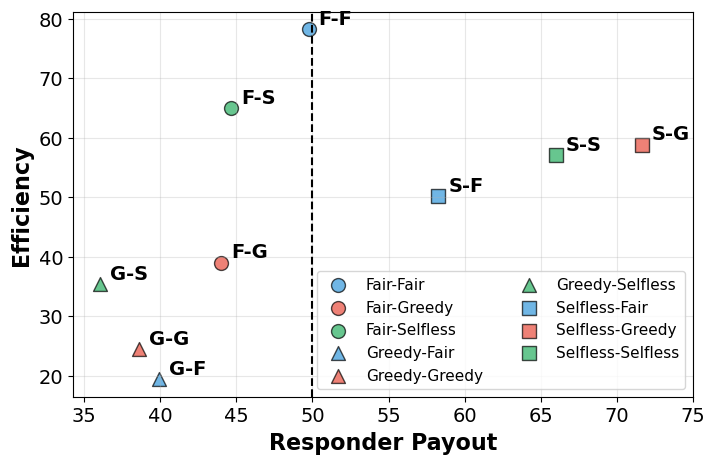

In [96]:
plt.figure(figsize=(8, 5))
ax2 = plt.subplot(1, 1, 1)

ax2.grid(False)

for i, scenario in enumerate(df['Scenario']):
    mark = markers[scenario.split('-')[0]]
    ax2.scatter(df.iloc[i]['Responder_Payout'], df.iloc[i]['Efficiency'], 
                c=fgs_colrs[scenario.split('-')[-1]], s=100, alpha=0.7, edgecolors='black', label=scenario, marker=mark)
    ax2.annotate(scenario.replace('Selfless', 'S').replace('Greedy', 'G').replace('Fair', 'F'), 
                (df.iloc[i]['Responder_Payout'], df.iloc[i]['Efficiency']),
                xytext=(10, 5), textcoords='offset pixels', fontsize=14, fontweight='bold')
    
ax2.axvline(x=50, color='black', linestyle='--')

ax2.set_xlim(right=75)
ax2.set_xlabel('Responder Payout', fontsize=16, fontweight='bold')
ax2.set_ylabel('Efficiency', fontsize=16, fontweight='bold')
# ax2.set_title('Rational Behavior', fontweight='bold', fontsize=17)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax2.legend(['S: Selfless', 'G: Greedy', 'F: Fair'], loc='upper left')
ax2.legend(ncol=2, loc='lower right', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.savefig('../plots/efficiency_proppay.pdf', dpi=600, bbox_inches='tight')

In [ ]:
scenario_stats = df.groupby('Scenario').agg({
    'Acceptance_Rate': ['mean', 'std', 'min', 'max']
}).round(1)
scenario_stats.columns = ['Mean', 'Std', 'Min', 'Max']
scenario_stats = scenario_stats.sort_values('Mean', ascending=True)

In [47]:
scenario_stats

NameError: name 'scenario_stats' is not defined

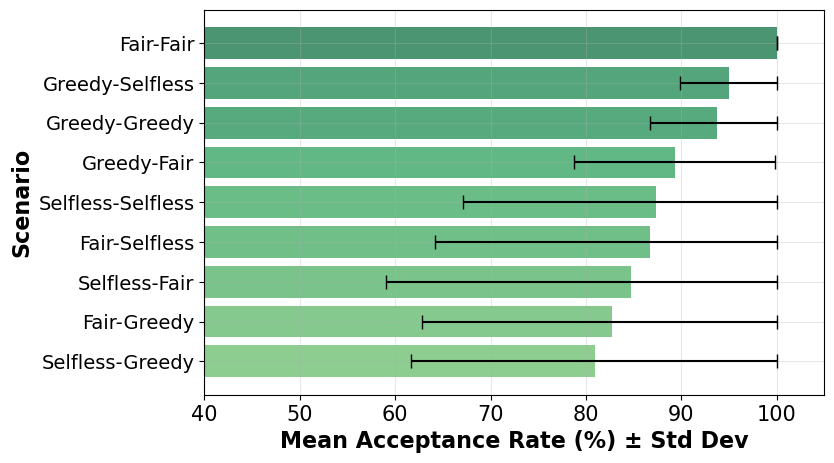

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))
scenario_stats = df.groupby('Scenario').agg({
    'Acceptance_Rate': ['mean', 'std', 'min', 'max']
}).round(1)
scenario_stats.columns = ['Mean', 'Std', 'Min', 'Max']
scenario_stats = scenario_stats.sort_values('Mean', ascending=True)

# Create horizontal bar chart with capped error bars
y_pos = range(len(scenario_stats))

# Cap the error bars so they don't exceed 100
lower_err = scenario_stats['Std']  # Left error bar (can go below 0, that's fine)
upper_err = np.minimum(scenario_stats['Std'], 100 - scenario_stats['Mean'])  # Cap at 100

# Create asymmetric error bars
xerr_array = [lower_err, upper_err]

bars3 = ax.barh(y_pos, scenario_stats['Mean'], xerr=xerr_array, 
                color=plt.cm.RdYlGn(scenario_stats['Mean']/100), alpha=0.7, capsize=5)

# ax.fill(100, 8, 120, 0, "b")

ax.set_xlim(left=40)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_yticks(y_pos)
ax.set_yticklabels(scenario_stats.index, fontsize=14)
ax.set_xlabel('Mean Acceptance Rate (%) ± Std Dev', fontsize=16, fontweight='bold')
ax.set_ylabel('Scenario', fontsize=16, fontweight='bold')
# ax.set_title('Scenario Difficulty Ranking\n(easier → harder from top to bottom)', fontweight='bold', fontsize=17)
ax.grid(True, alpha=0.3)

plt.savefig('../plots/scenario_difficulty.pdf', dpi=500, bbox_inches='tight')

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

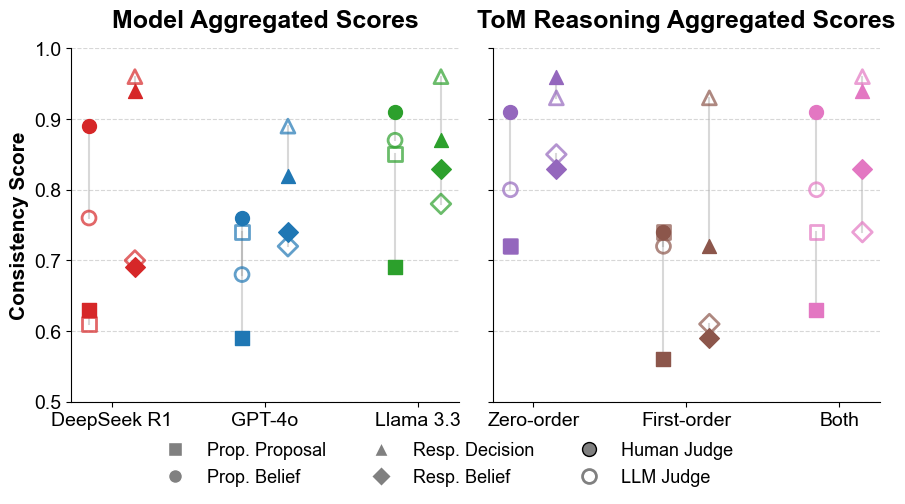

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Top Half: Model Aggregated
data_models = [
    # Deepseek R1
    {"Model": "DeepSeek R1", "Metric": "Prop. Proposal", "Human": 0.63, "LLM": 0.61},
    {"Model": "DeepSeek R1", "Metric": "Prop. Belief",   "Human": 0.89, "LLM": 0.76},
    {"Model": "DeepSeek R1", "Metric": "Resp. Decision", "Human": 0.94, "LLM": 0.96},
    {"Model": "DeepSeek R1", "Metric": "Resp. Belief",   "Human": 0.69, "LLM": 0.70},
    # GPT-4o
    {"Model": "GPT-4o",      "Metric": "Prop. Proposal", "Human": 0.59, "LLM": 0.74},
    {"Model": "GPT-4o",      "Metric": "Prop. Belief",   "Human": 0.76, "LLM": 0.68},
    {"Model": "GPT-4o",      "Metric": "Resp. Decision", "Human": 0.82, "LLM": 0.89},
    {"Model": "GPT-4o",      "Metric": "Resp. Belief",   "Human": 0.74, "LLM": 0.72},
    # Llama 3.3 70B
    {"Model": "Llama 3.3", "Metric": "Prop. Proposal", "Human": 0.69, "LLM": 0.85},
    {"Model": "Llama 3.3", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.87},
    {"Model": "Llama 3.3", "Metric": "Resp. Decision", "Human": 0.87, "LLM": 0.96},
    {"Model": "Llama 3.3", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.78},
]

# Bottom Half: ToM Reasoning Aggregated
data_tom = [
    # Zero-order
    {"Method": "Zero-order", "Metric": "Prop. Proposal", "Human": 0.72, "LLM": 0.72},
    {"Method": "Zero-order", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.80},
    {"Method": "Zero-order", "Metric": "Resp. Decision", "Human": 0.96, "LLM": 0.93},
    {"Method": "Zero-order", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.85},
    # First-order
    {"Method": "First-order", "Metric": "Prop. Proposal", "Human": 0.56, "LLM": 0.74},
    {"Method": "First-order", "Metric": "Prop. Belief",   "Human": 0.74, "LLM": 0.72},
    {"Method": "First-order", "Metric": "Resp. Decision", "Human": 0.72, "LLM": 0.93},
    {"Method": "First-order", "Metric": "Resp. Belief",   "Human": 0.59, "LLM": 0.61},
    # Both
    {"Method": "Both", "Metric": "Prop. Proposal", "Human": 0.63, "LLM": 0.74},
    {"Method": "Both", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.80},
    {"Method": "Both", "Metric": "Resp. Decision", "Human": 0.94, "LLM": 0.96},
    {"Method": "Both", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.74},
]

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial"
})

df_models = pd.DataFrame(data_models)
df_tom = pd.DataFrame(data_tom)

fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), sharey=True)
plt.subplots_adjust(wspace=0.1)

markers = {
    "Prop. Proposal": "s", # Square
    "Prop. Belief": "o",   # Circle
    "Resp. Decision": "^", # Triangle
    "Resp. Belief": "D"    # Diamond
}

model_colors = {
    "DeepSeek R1": "#d62728",    # Red
    "GPT-4o": "#1f77b4",         # Blue
    "Llama 3.3": "#2ca02c"   # Green
}

tom_colors = {
    "Zero-order": "#9467bd",  # Purple
    "First-order": "#8c564b", # Brown
    "Both": "#e377c2"         # Pink
}

def plot_subplot(ax, df, x_col, color_map, title):
    # Get unique X categories to map to positions
    categories = list(color_map.keys())
    x_map = {cat: i for i, cat in enumerate(categories)}

    # Iterate and plot
    # Add slight jitter based on Metric to prevent total overlap
    metric_offsets = {
        "Prop. Proposal": -0.15,
        "Prop. Belief": -0.15,
        "Resp. Decision": 0.15,
        "Resp. Belief": 0.15
    }

    for _, row in df.iterrows():
        x_base = x_map[row[x_col]]
        offset = metric_offsets[row["Metric"]]
        x_pos = x_base + offset
        color = color_map[row[x_col]]
        marker = markers[row["Metric"]]

        # Plot Human (Filled)
        ax.scatter(
            x_pos, row["Human"], 
            marker=marker, 
            s=100, 
            facecolors=color, 
            edgecolors=None,
            linewidth=1,
            alpha=1.0,
            zorder=2
        )

        # Plot LLM (Transparent/Hollow)
        ax.scatter(
            x_pos, row["LLM"], 
            marker=marker, 
            s=100, 
            facecolors='none', 
            edgecolors=color, 
            linewidth=2,
            alpha=0.7,
            zorder=2
        )

        # Connect them with a faint line to show pairing
        ax.plot([x_pos, x_pos], [row["Human"], row["LLM"]], color='gray', alpha=0.3, zorder=1)

    # Styling
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, fontsize=14, fontweight='normal')
    ax.set_title(title, fontsize=18, pad=15, fontweight='bold')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    ax.set_ylim(0.5, 1.0)

    ax.tick_params(axis='y', labelsize=14)

    # Despine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plot_subplot(axes[0], df_models, "Model", model_colors, "Model Aggregated Scores")
plot_subplot(axes[1], df_tom, "Method", tom_colors, "ToM Reasoning Aggregated Scores")

axes[0].set_ylabel("Consistency Score", fontsize=15, fontweight='bold')

from matplotlib.lines import Line2D

marker_handles = [
    Line2D([0], [0], marker=m, color='w', markerfacecolor='gray', markersize=10, label=k)
    for k, m in markers.items()
]

judge_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor='k', markersize=10, label='Human Judge'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor='gray', markeredgewidth=2, markersize=10, label='LLM Judge')
]

fig.legend(
    handles=marker_handles + judge_handles,
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.13),
    ncol=3, 
    frameon=False,
    fontsize=13
)

plt.tight_layout()
plt.savefig("../plots/consistency_grid_plot.pdf", bbox_inches='tight', dpi=500)

In [5]:
# 1. Define Data (same as previous turn)
data_models = [
    # Deepseek R1
    {"Model": "DeepSeek R1", "Metric": "Prop. Proposal", "Human": 0.63, "LLM": 0.61},
    {"Model": "DeepSeek R1", "Metric": "Prop. Belief",   "Human": 0.89, "LLM": 0.76},
    {"Model": "DeepSeek R1", "Metric": "Resp. Decision", "Human": 0.94, "LLM": 0.96},
    {"Model": "DeepSeek R1", "Metric": "Resp. Belief",   "Human": 0.69, "LLM": 0.70},
    # GPT-4o
    {"Model": "GPT-4o",      "Metric": "Prop. Proposal", "Human": 0.59, "LLM": 0.74},
    {"Model": "GPT-4o",      "Metric": "Prop. Belief",   "Human": 0.76, "LLM": 0.68},
    {"Model": "GPT-4o",      "Metric": "Resp. Decision", "Human": 0.82, "LLM": 0.89},
    {"Model": "GPT-4o",      "Metric": "Resp. Belief",   "Human": 0.74, "LLM": 0.72},
    # Llama 3.3 70B
    {"Model": "Llama 3.3 70B", "Metric": "Prop. Proposal", "Human": 0.69, "LLM": 0.85},
    {"Model": "Llama 3.3 70B", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.87},
    {"Model": "Llama 3.3 70B", "Metric": "Resp. Decision", "Human": 0.87, "LLM": 0.96},
    {"Model": "Llama 3.3 70B", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.78},
]

data_tom = [
    # Zero-order
    {"Method": "Zero-order", "Metric": "Prop. Proposal", "Human": 0.72, "LLM": 0.72},
    {"Method": "Zero-order", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.80},
    {"Method": "Zero-order", "Metric": "Resp. Decision", "Human": 0.96, "LLM": 0.93},
    {"Method": "Zero-order", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.85},
    # First-order
    {"Method": "First-order", "Metric": "Prop. Proposal", "Human": 0.56, "LLM": 0.74},
    {"Method": "First-order", "Metric": "Prop. Belief",   "Human": 0.74, "LLM": 0.72},
    {"Method": "First-order", "Metric": "Resp. Decision", "Human": 0.72, "LLM": 0.93},
    {"Method": "First-order", "Metric": "Resp. Belief",   "Human": 0.59, "LLM": 0.61},
    # Both
    {"Method": "Both", "Metric": "Prop. Proposal", "Human": 0.63, "LLM": 0.74},
    {"Method": "Both", "Metric": "Prop. Belief",   "Human": 0.91, "LLM": 0.80},
    {"Method": "Both", "Metric": "Resp. Decision", "Human": 0.94, "LLM": 0.96},
    {"Method": "Both", "Metric": "Resp. Belief",   "Human": 0.83, "LLM": 0.74},
]

# Create DataFrames
df_models = pd.DataFrame(data_models)
df_tom = pd.DataFrame(data_tom)
df_overall = pd.concat([df_models, df_tom], ignore_index=True)

In [7]:
from metric_utils import CAC

In [9]:
df_models

,Model,Metric,Human,LLM
0,DeepSeek R1,Prop. Proposal,0.63,0.61
1,DeepSeek R1,Prop. Belief,0.89,0.76
2,DeepSeek R1,Resp. Decision,0.94,0.96
3,DeepSeek R1,Resp. Belief,0.69,0.70
4,GPT-4o,Prop. Proposal,0.59,0.74
5,GPT-4o,Prop. Belief,0.76,0.68
6,GPT-4o,Resp. Decision,0.82,0.89
7,GPT-4o,Resp. Belief,0.74,0.72
8,Llama 3.3 70B,Prop. Proposal,0.69,0.85
9,Llama 3.3 70B,Prop. Belief,0.91,0.87


In [16]:
models_cac = CAC(df_models[['Human', 'LLM']])
print('Models AC1: ', models_cac.gwet()['est']['coefficient_value'])

tom_cac = CAC(df_tom[['Human', 'LLM']])
print('ToM AC1: ', tom_cac.gwet()['est']['coefficient_value'])

overall_cac = CAC(df_overall[['Human', 'LLM']])
print('Overall AC1: ', overall_cac.gwet()['est']['coefficient_value'])

Models AC1:  -0.05837
ToM AC1:  0.00907
Overall AC1:  -0.00546


In [18]:
models_cac = CAC(df_models[['Human', 'LLM']])
print('Models AC1: ', models_cac.krippendorff()['est']['coefficient_value'])

tom_cac = CAC(df_tom[['Human', 'LLM']])
print('ToM AC1: ', tom_cac.krippendorff()['est']['coefficient_value'])

overall_cac = CAC(df_overall[['Human', 'LLM']])
print('Overall AC1: ', overall_cac.krippendorff()['est']['coefficient_value'])

Models AC1:  -0.02222
ToM AC1:  0.02317
Overall AC1:  -0.00093
